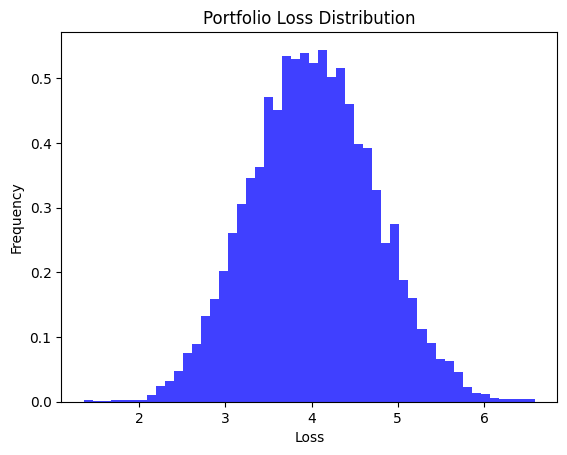

Expected Loss (EL): 4.02
Unexpected Loss (UL): 0.72
Value-at-Risk (VaR 99%): 5.68
Value-at-Risk (VaR 95%): 5.20


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Parameters
n_assets = 100  # Number of assets in the portfolio
n_simulations = 10000  # Number of simulations
rho = 0.2

# Randomly generate PD and LGD
np.random.seed(10)
PD = np.random.uniform(0.01, 0.20, n_assets)  # Probability of default between 1% and 20%
LGD = np.random.uniform(0.20, 0.60, n_assets)  # Loss given default between 20% and 60%

# Simulate portfolio losses
losses = np.zeros(n_simulations)

for i in range(n_simulations):
    # Generate correlated normal variables
    correlated_randoms = np.dot(rho, np.random.normal(size=n_assets))
    # Adjust PD to standard normal thresholds
    adjusted_PD = np.percentile(correlated_randoms, PD * 100)
    default_events = correlated_randoms < adjusted_PD
    
    # Calculate loss for each simulation
    loss = np.sum(default_events * LGD)
    losses[i] = loss

# Portfolio loss distribution
plt.hist(losses, bins=50, density=True, alpha=0.75, color='blue')
plt.title('Portfolio Loss Distribution')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.show()

# Expected Loss (EL)
EL = np.mean(losses)
print(f"Expected Loss (EL): {EL:.2f}")

# Unexpected Loss (UL) - Standard Deviation of Losses
UL = np.std(losses)
print(f"Unexpected Loss (UL): {UL:.2f}")

# Value-at-Risk (VaR) at 99% confidence level
VaR_99 = np.percentile(losses, 99)
print(f"Value-at-Risk (VaR 99%): {VaR_99:.2f}")

# Value-at-Risk (VaR) at 95% confidence level
VaR_95 = np.percentile(losses, 95)
print(f"Value-at-Risk (VaR 95%): {VaR_95:.2f}")
